# 1. Preparing the tools

- pandas for data analysis.
- NumPy for numerical operations.
- Matplotlib/seaborn for plotting or data visualization.
- Scikit-Learn for machine learning modelling and evaluation.

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy

import pandas as pd # pandas is so commonly used, it's shortened to pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns # seaborn gets shortened to sns, TK - can seaborn be removed for matplotlib (simpler)?

## Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier # For ANN
from sklearn.svm import SVC  # For SVM (Support Vector Machine)
from sklearn.naive_bayes import GaussianNB  # For Naive Bayes
from sklearn.naive_bayes import BernoulliNB  # For binary classification

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of libraries we're using (as long as yours are equal or greater than these, your code should work)
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2024-12-26 18:30:23.452427

NumPy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4
Scikit-Learn version: 1.6.0


# 2. Loading Data

In [2]:
df = pd.read_csv("diabetes.csv")
df.shape # (rows,columns)

(768, 9)

# 3. Data Exploration (exploratory data analysis or EDA)

In [3]:
# Check the head of our DataFrame 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# And the top 10
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#Number of positive(1) and negative(0) samples in pur dataframe
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Normalized value counts
df.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

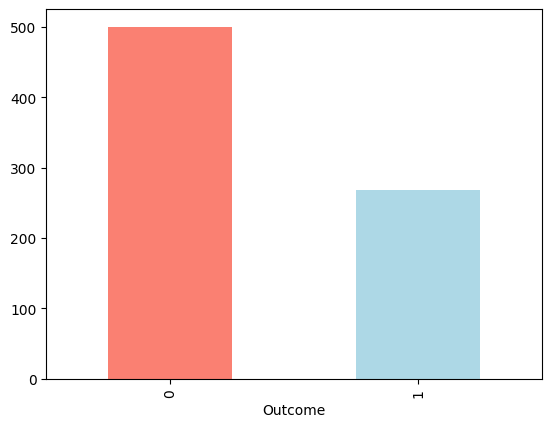

In [8]:
# Plot the value counts with a bar graph
df.Outcome.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 3.1 Comparing one feature to another

In [11]:
# Compare Outcome column with sex column
pd.crosstab(index=df.Outcome, columns=df.Age)

Age,21,22,23,24,25,26,27,28,29,30,...,63,64,65,66,67,68,69,70,72,81
Outcome,,,,,,,,,,,,,,,,,,,,,
0,58,61,31,38,34,25,24,25,16,15,...,4,1,3,2,2,1,2,0,1,1
1,5,11,7,8,14,8,8,10,13,6,...,0,0,0,2,1,0,0,1,0,0


### 3.2 Making our comparison visual

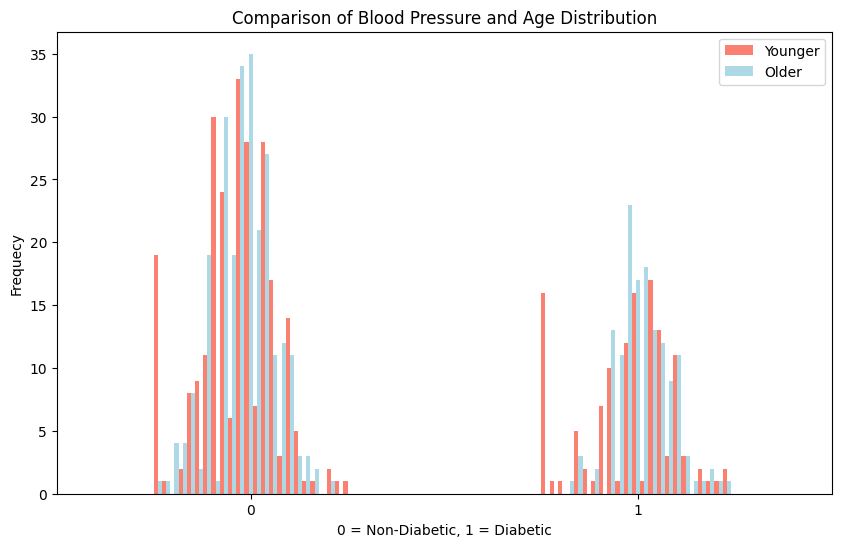

In [12]:

# Create a plot
pd.crosstab(df.Outcome, df.BloodPressure).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Comparison of Blood Pressure and Age Distribution")
plt.xlabel("0 = Non-Diabetic, 1 = Diabetic")
plt.ylabel("Frequecy")
plt.legend(["Younger", "Older"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

### 3.3 Comparing Age and Glucose
Let's combine a couple of independent variables, such as, Age and Glucose and then comparing them to our Outcome variable.

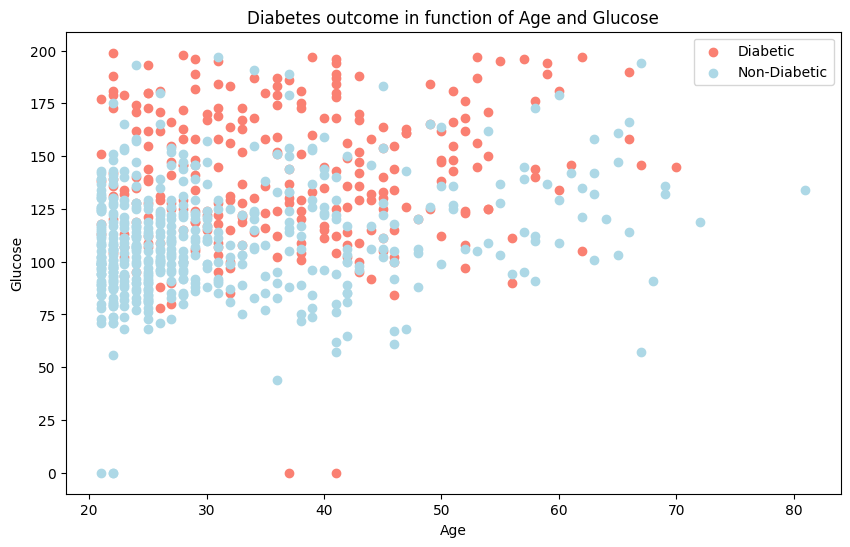

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.Age[df.Outcome==1], 
            df.Glucose[df.Outcome==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.Age[df.Outcome==0], 
            df.Glucose[df.Outcome==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Diabetes outcome in function of Age and Glucose")
plt.xlabel("Age")
plt.legend(["Diabetic", "Non-Diabetic"])
plt.ylabel("Glucose");

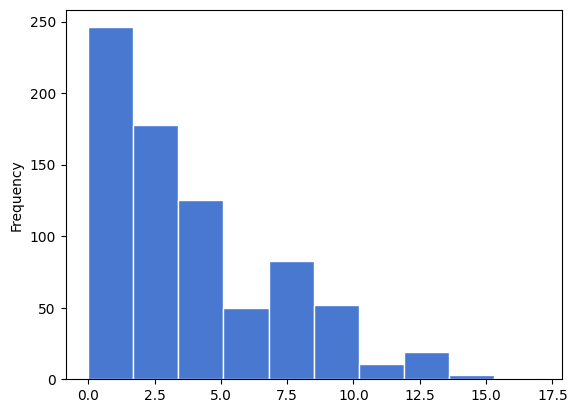

In [14]:
#Histogram to check the distribution of the variable age
df.Pregnancies.plot.hist(edgecolor='white', color='#4878CF');

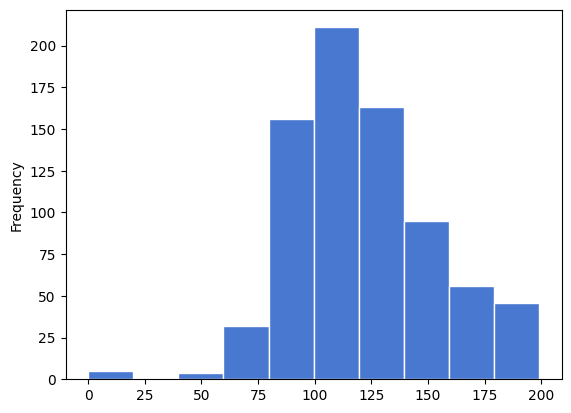

In [15]:
df.Glucose.plot.hist(edgecolor='white', color='#4878CF');

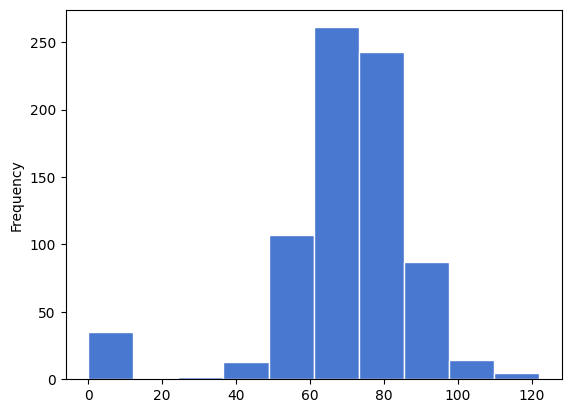

In [16]:
df.BloodPressure.plot.hist(edgecolor='white', color='#4878CF');

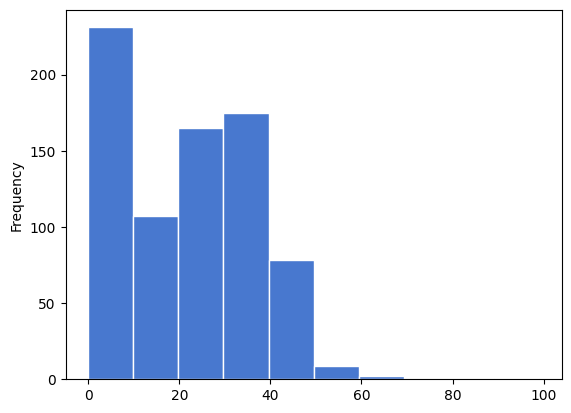

In [17]:
df.SkinThickness.plot.hist(edgecolor='white', color='#4878CF');

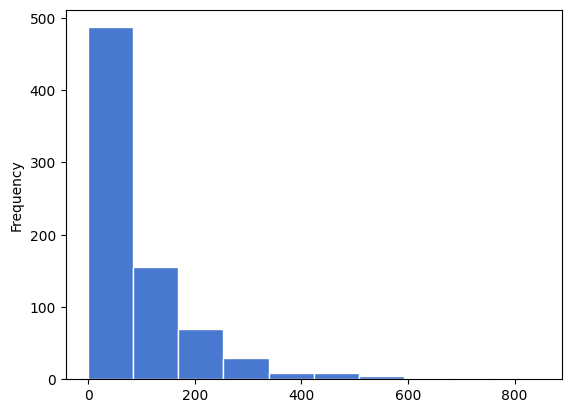

In [18]:
df.Insulin.plot.hist(edgecolor='white', color='#4878CF');

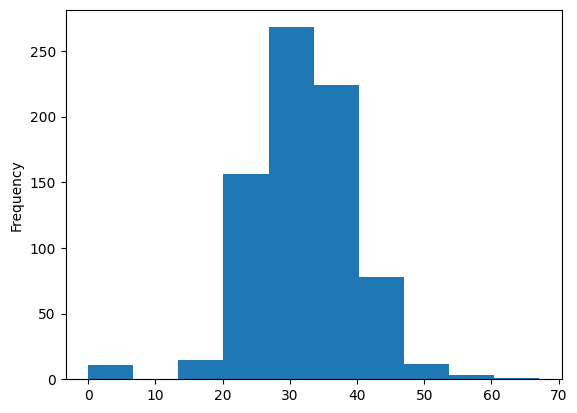

In [19]:
df.BMI.plot.hist();

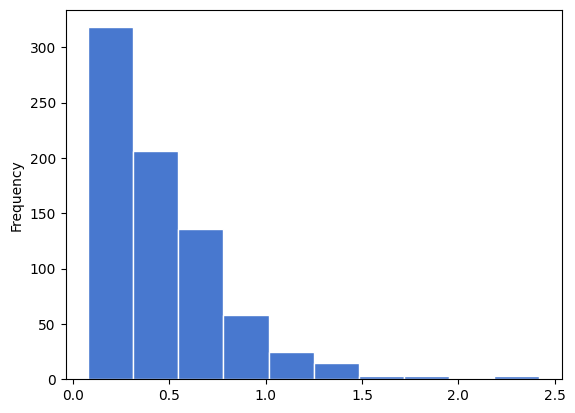

In [20]:
df.DiabetesPedigreeFunction.plot.hist(edgecolor='white', color='#4878CF');

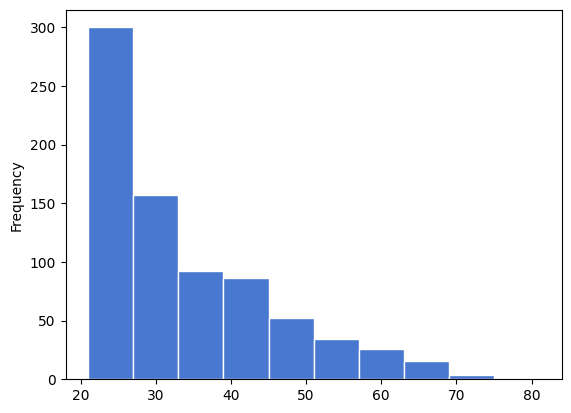

In [21]:
df.Age.plot.hist(edgecolor='white', color='#4878CF');

### 3.4 Comparing Diabetes frequency and DiabetesPedigreeFunction

In [22]:
pd.crosstab(index=df.Pregnancies, columns=df.Outcome)

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


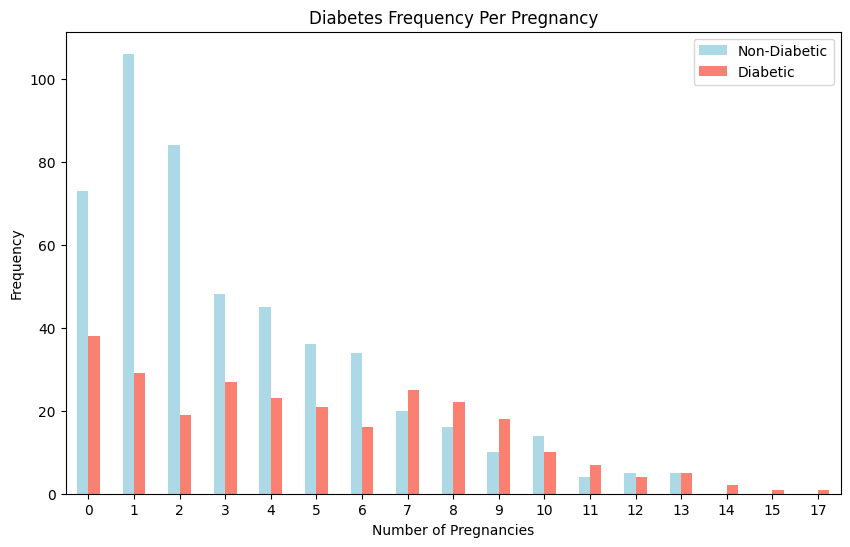

In [23]:

# Create a new crosstab and base plot
pd.crosstab(df.Pregnancies, df.Outcome).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Diabetes Frequency Per Pregnancy")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Frequency")
plt.legend(["Non-Diabetic", "Diabetic"])
plt.xticks(rotation = 0);

### 3.5 Correlation between independent variables

In [24]:
#correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


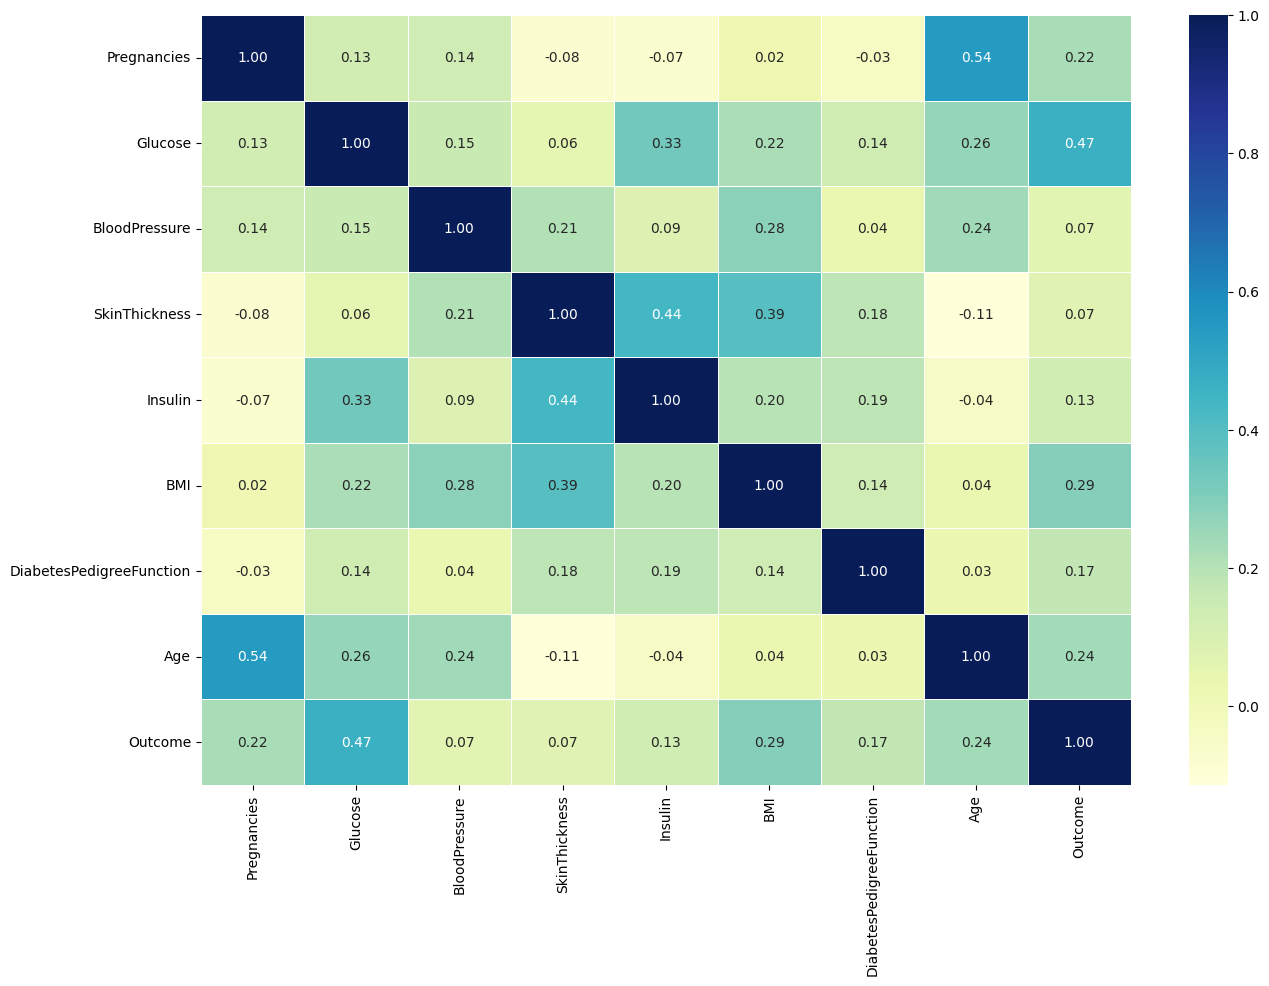

In [25]:
# Let's visualize the correlation
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# 4. Modeling
We will now be predicting our Outcome variable variable using all of the other variables. For this, we will split the Outcome variable from the rest.

In [26]:
# Everything except Outcome variable
X = df.drop(labels="Outcome", axis=1)

# Outcome variable
y = df.Outcome.to_numpy()

In [27]:
# Independent variables (no Outcome column)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [28]:
# Outcomes (in the form of a NumPy array)
y, type(y)

(array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 

### 4.1 Creating a training and test split

Now, we will split our data into a training set and a test set. To split our data into a training and test set, we can use Scikit-Learn's sklearn.model_selection.train_test_split() and feed it our independent and dependent variables (X & y).

In [29]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [30]:
# Training data of independent variable
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [31]:
# Training data of dependent variable
y_train, len(y_train)

(array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 

In [32]:
# Testing data of independent variable
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [33]:
# Testing data of dependent variable
y_test, len(y_test)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       dtype=int64),
 154)

### 4.2 Choosing a model
We'll start by trying the following models and comparing their results.

1. Logistic Regression - sklearn.linear_model.LogisticRegression()
2. K-Nearest Neighbors - sklearn.neighbors.KNeighboursClassifier()
3. RandomForest - sklearn.ensemble.RandomForestClassifier()
4. Decision Tree: sklearn.tree.DecisionTreeClassifier()
5. SVC:sklearn.svm.
6. ANN: MLPClassifier(max_iter=1000)
7. Naive Bayes (Gaussian): sklearn.naive_bayes.GaussianNB()
8. Naive Bayes (Bernoulli): sklearn.naive_bayes.BernoulliNB()

In [34]:
#Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=100), # Note: if you see a warning about "convergence not reached", you can increase `max_iter` until convergence is reached
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "SVC": SVC(),
          "ANN": MLPClassifier(max_iter=1000),
          "Naive Bayes (Gaussian)": GaussianNB(),
          "Naive Bayes (Bernoulli)": BernoulliNB()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # Fits and evaluates given machine learning models.
    # models : a dict of different Scikit-Learn machine learning models
    # X_train : training data
    # X_test : testing data
    # y_train : labels assosciated with training data
    # y_test : labels assosciated with test data
    
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [35]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)
model_scores

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6623376623376623,
 'Logistic Regression': 0.7467532467532467,
 'Random Forest': 0.7207792207792207,
 'Decision Tree': 0.7727272727272727,
 'SVC': 0.7662337662337663,
 'ANN': 0.7272727272727273,
 'Naive Bayes (Gaussian)': 0.7662337662337663,
 'Naive Bayes (Bernoulli)': 0.6558441558441559}

In [36]:
recall_scores = {
    name: recall_score(y_test, model.predict(X_test), average='weighted')
    for name, model in models.items()
}

recall_scores

{'KNN': 0.6623376623376623,
 'Logistic Regression': 0.7467532467532467,
 'Random Forest': 0.7207792207792207,
 'Decision Tree': 0.7727272727272727,
 'SVC': 0.7662337662337663,
 'ANN': 0.7272727272727273,
 'Naive Bayes (Gaussian)': 0.7662337662337663,
 'Naive Bayes (Bernoulli)': 0.6558441558441559}

### 4.3 Comparing the results of several models

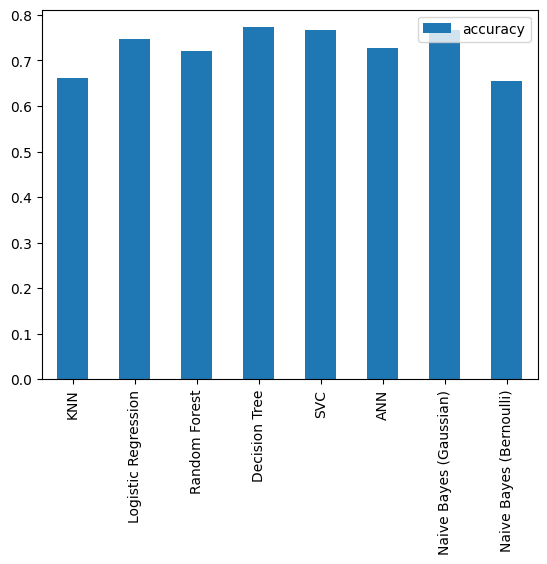

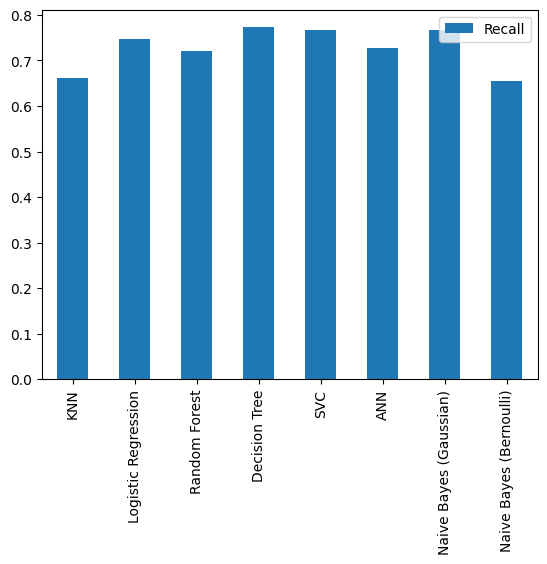

In [37]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

model_compare = pd.DataFrame(recall_scores, index=['Recall'])
model_compare.T.plot.bar();

In [38]:
# Calculate precision
precision_scores = {
    name: precision_score(y_test, model.predict(X_test), average='weighted')
    for name, model in models.items()
}

In [39]:
f1_scores = {
    name: f1_score(y_test, model.predict(X_test), average='weighted')
    for name, model in models.items()
}

In [40]:
specificity_scores = {}
for name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    tn = cm[0][0]
    fp = cm[0][1]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_scores[name] = specificity

In [41]:
classification_error_scores = {
    name: 1 - accuracy
    for name, accuracy in model_scores.items()
}

In [42]:
model_comparison = pd.DataFrame({
    "Accuracy (%)": [score * 100 for score in model_scores.values()],
    "Recall (%)": [score * 100 for score in recall_scores.values()],
     "Precision (%)": [score * 100 for score in precision_scores.values()],
    "F1 Score (%)": [score * 100 for score in f1_scores.values()],
    "Specificity (%)": [score * 100 for score in specificity_scores.values()],
    "Classification Error (%)": [error * 100 for error in classification_error_scores.values()]
    
}, index=model_scores.keys())

# Display the DataFrame
print(model_comparison)

# Optional: Pretty-print the table
model_comparison.style.format({"Accuracy (%)": "{:.2f}", 
                               "Recall (%)": "{:.2f}",
                               "Precision (%)": "{:.2f}", 
                               "F1 Score (%)": "{:.2f}", 
                               "Specificity (%)": "{:.2f}", 
                               "Classification Error (%)": "{:.2f}"})

                         Accuracy (%)  Recall (%)  Precision (%)  \
KNN                         66.233766   66.233766      67.122460   
Logistic Regression         74.675325   74.675325      75.015394   
Random Forest               72.077922   72.077922      72.193878   
Decision Tree               77.272727   77.272727      78.120617   
SVC                         76.623377   76.623377      76.133609   
ANN                         72.727273   72.727273      71.904463   
Naive Bayes (Gaussian)      76.623377   76.623377      77.066395   
Naive Bayes (Bernoulli)     65.584416   65.584416      68.785714   

                         F1 Score (%)  Specificity (%)  \
KNN                         66.579433        70.707071   
Logistic Regression         74.816688        78.787879   
Random Forest               72.132829        77.777778   
Decision Tree               77.536135        78.787879   
SVC                         75.860058        87.878788   
ANN                         71.836735  

,Accuracy (%),Recall (%),Precision (%),F1 Score (%),Specificity (%),Classification Error (%)
KNN,66.23,66.23,67.12,66.58,70.71,33.77
Logistic Regression,74.68,74.68,75.02,74.82,78.79,25.32
Random Forest,72.08,72.08,72.19,72.13,77.78,27.92
Decision Tree,77.27,77.27,78.12,77.54,78.79,22.73
SVC,76.62,76.62,76.13,75.86,87.88,23.38
ANN,72.73,72.73,71.90,71.84,84.85,27.27
Naive Bayes (Gaussian),76.62,76.62,77.07,76.79,79.80,23.38
Naive Bayes (Bernoulli),65.58,65.58,68.79,54.23,98.99,34.42


# 5. Hyperparameter tuning and cross-validation

### 5.1 Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [43]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [44]:
# KNN's train scores
train_scores

[1.0,
 0.8322475570032574,
 0.8550488599348535,
 0.8094462540716613,
 0.7980456026058632,
 0.7882736156351792,
 0.7931596091205212,
 0.7768729641693811,
 0.7931596091205212,
 0.7899022801302932,
 0.7866449511400652,
 0.7833876221498371,
 0.7899022801302932,
 0.7899022801302932,
 0.7850162866449512,
 0.7850162866449512,
 0.7833876221498371,
 0.7703583061889251,
 0.7752442996742671,
 0.7719869706840391]

Maximum KNN score on the test data: 77.92%


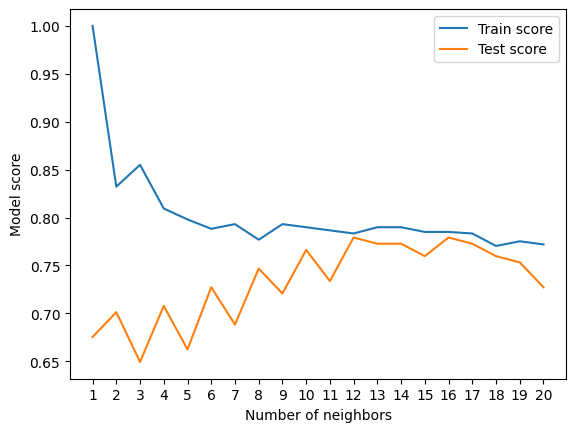

In [45]:
#Let's visualize KNN score test and train data
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### 5.2 Tuning models with with RandomizedSearchCV

In [46]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Define DecisionTreeClassifier hyperparameter
dt_grid = {
    "max_depth": [None, 3, 5, 10, 20],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [None, "sqrt", "log2"]
}

# Define SVC hyperparameters
svc_grid = {
    "C": np.logspace(-4, 4, 20),
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"]
}

# Different KNN hyperparameters
knn_grid = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": np.arange(20, 60, 5),
    "p": [1, 2]
}

# Define ANN hyperparameters
ann_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 100)],  # Different layer sizes
    "activation": ["tanh", "relu"],  # Activation functions
    "solver": ["adam", "sgd"],  # Optimization solvers
    "alpha": np.logspace(-4, 4, 20),  # Regularization term
    "learning_rate": ["constant", "adaptive"],  # Learning rate strategy
    "max_iter": [500, 1000]  # Max iterations for convergence
}

# Define Naive Bayes (Gaussian) hyperparameters
nb_gaussian_grid = {
    "var_smoothing": np.logspace(-9, 0, 10)  # Smoothing parameter
}

# Define Naive Bayes (Bernoulli) hyperparameters
nb_bernoulli_grid = {
    "alpha": np.logspace(-4, 4, 20),  # Additive smoothing parameter
    "binarize": [0.0, 0.1, 0.2, 0.3],  # Threshold for binarizing input
}


In [47]:
%%time 

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 578 ms
Wall time: 600 ms


In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [49]:
rs_log_reg.score(X_test, y_test)

0.7597402597402597

In [50]:
%%time 

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1min 15s
Wall time: 1min 18s


In [51]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [52]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.7467532467532467

In [53]:
%%time

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for DecisionTreeClassifier
rs_dt = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=dt_grid,
    cv=5,
    n_iter=20,
    verbose=True,
    random_state=42
)

# Fit the random hyperparameter search model
rs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 469 ms
Wall time: 471 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   random_state=42, verbose=True)

In [54]:
# Find the best parameters
rs_dt.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 17,
 'max_features': None,
 'max_depth': None}

In [55]:
# Evaluate the randomized search Decision Tree model
rs_dt.score(X_test, y_test)

0.7532467532467533

In [56]:
# %%time 

# # Setup random seed
# np.random.seed(42)

# # Setup random hyperparameter search for SVC
# rs_svc = RandomizedSearchCV(SVC(),
#                             param_distributions=svc_grid,
#                             cv=5,
#                             n_iter=20,
#                             verbose=True)

# # Fit random hyperparameter search model
# rs_svc.fit(X_train, y_train)

In [57]:
# # Find the best parameters
# rs_svc.best_params_

In [58]:
# # Evaluate the randomized search SVC model
# rs_svc.score(X_test, y_test)

In [59]:
%%time 

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for KNN
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                            param_distributions=knn_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

# Fit random hyperparameter search model
rs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 2.84 s
Wall time: 1.49 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([20, 25, 30, 35, 40, 45, 50, 55]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [60]:
# Find the best parameters
rs_knn.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 9,
 'leaf_size': 50,
 'algorithm': 'brute'}

In [61]:
# Evaluate the randomized search KNN model
rs_knn.score(X_test, y_test)

0.7077922077922078

In [62]:
%%time

# Setup random hyperparameter search for GaussianNB
rs_nb_gaussian = RandomizedSearchCV(GaussianNB(), 
                                    param_distributions=nb_gaussian_grid, 
                                    cv=5, 
                                    n_iter=20, 
                                    verbose=True, 
                                    random_state=42)

# Fit random hyperparameter search model
rs_nb_gaussian.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: total: 453 ms
Wall time: 234 ms


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20,
                   param_distributions={'var_smoothing': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])},
                   random_state=42, verbose=True)

In [63]:
# Find the best parameters for Naive Bayes (Gaussian)
print("Best parameters for Gaussian Naive Bayes:", rs_nb_gaussian.best_params_)

Best parameters for Gaussian Naive Bayes: {'var_smoothing': 1e-09}


In [64]:
# Evaluate the model on the test set
print("Naive Bayes (Gaussian) model test score:", rs_nb_gaussian.score(X_test, y_test))

Naive Bayes (Gaussian) model test score: 0.7662337662337663


In [65]:
%%time 
# Setup random hyperparameter search for BernoulliNB
rs_nb_bernoulli = RandomizedSearchCV(BernoulliNB(), 
                                     param_distributions=nb_bernoulli_grid, 
                                     cv=5, 
                                     n_iter=20, 
                                     verbose=True, 
                                     random_state=42)

# Fit random hyperparameter search model
rs_nb_bernoulli.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 453 ms
Wall time: 442 ms


RandomizedSearchCV(cv=5, estimator=BernoulliNB(), n_iter=20,
                   param_distributions={'alpha': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'binarize': [0.0, 0.1, 0.2, 0.3]},
                   random_state=42, verbose=True)

In [66]:
# Find the best parameters for Naive Bayes (Bernoulli)
print("Best parameters for Bernoulli Naive Bayes:", rs_nb_bernoulli.best_params_)

Best parameters for Bernoulli Naive Bayes: {'binarize': 0.2, 'alpha': 1438.44988828766}


In [67]:
# Evaluate the model on the test set
print("Naive Bayes (Bernoulli) model test score:", rs_nb_bernoulli.score(X_test, y_test))

Naive Bayes (Bernoulli) model test score: 0.6428571428571429


In [68]:
# Define function to calculate classification error and specificity
def classification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

def specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm.sum(axis=1) - cm.diagonal()  # True negatives for each class
    fp = cm.sum(axis=0) - cm.diagonal()  # False positives for each class
    specificity_per_class = tn / (tn + fp + 1e-10)  # Avoid division by zero
    return specificity_per_class.mean()  # Average specificity across all classes

tuned_model_scores = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, rs_log_reg.predict(X_test)),
        "Precision": precision_score(y_test, rs_log_reg.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_log_reg.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_log_reg.predict(X_test)),
        "Specificity": specificity(y_test, rs_log_reg.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_log_reg.predict(X_test), average="weighted"),
    },
    "KNN": {
        "Accuracy": accuracy_score(y_test, rs_knn.predict(X_test)),
        "Precision": precision_score(y_test, rs_knn.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_knn.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_knn.predict(X_test)),
        "Specificity": specificity(y_test, rs_knn.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_knn.predict(X_test), average="weighted"),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rs_rf.predict(X_test)),
        "Precision": precision_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_rf.predict(X_test)),
        "Specificity": specificity(y_test, rs_rf.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_rf.predict(X_test), average="weighted"),
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, rs_dt.predict(X_test)),
        "Precision": precision_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_dt.predict(X_test)),
        "Specificity": specificity(y_test, rs_dt.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_dt.predict(X_test), average="weighted"),
    },
    "Naive Bayes (GaussianNB)": {
        "Accuracy": accuracy_score(y_test, rs_nb_gaussian.predict(X_test)),
        "Precision": precision_score(y_test, rs_nb_gaussian.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_nb_gaussian.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_nb_gaussian.predict(X_test)),
        "Specificity": specificity(y_test, rs_nb_gaussian.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_nb_gaussian.predict(X_test), average="weighted"),
    },
    "Naive Bayes (BernoulliNB)": {
        "Accuracy": accuracy_score(y_test, rs_nb_bernoulli.predict(X_test)),
        "Precision": precision_score(y_test, rs_nb_bernoulli.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_nb_bernoulli.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_nb_bernoulli.predict(X_test)),
        "Specificity": specificity(y_test, rs_nb_bernoulli.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_nb_bernoulli.predict(X_test), average="weighted"),
    }
}

# Convert results to a DataFrame
tuned_model_comparison = pd.DataFrame(tuned_model_scores).T * 100  # Convert to percentages

# Display the DataFrame
print(tuned_model_comparison)

# Optional: Pretty-print the table
tuned_model_comparison.style.format({"Accuracy": "{:.2f}%",
    "Precision": "{:.2f}%",
    "Recall (Sensitivity)": "{:.2f}%",
    "Classification Error": "{:.2f}%",
    "Specificity": "{:.2f}%",
    "F1 Score": "{:.2f}%"})

                            Accuracy  Precision  Recall (Sensitivity)  \
Logistic Regression        75.974026  76.075073             75.974026   
KNN                        70.779221  70.900146             70.779221   
Random Forest              74.675325  74.781341             74.675325   
Decision Tree              75.324675  76.364905             75.324675   
Naive Bayes (GaussianNB)   76.623377  77.066395             76.623377   
Naive Bayes (BernoulliNB)  64.285714  41.326531             64.285714   

                           Classification Error  Specificity   F1 Score  
Logistic Regression                   24.025974         50.0  76.021271  
KNN                                   29.220779         50.0  70.836681  
Random Forest                         25.324675         50.0  74.725124  
Decision Tree                         24.675325         50.0  75.641646  
Naive Bayes (GaussianNB)              23.376623         50.0  76.792497  
Naive Bayes (BernoulliNB)             35.714

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Recall (Sensitivity),Classification Error,Specificity,F1 Score
Logistic Regression,75.97%,76.08%,75.97%,24.03%,50.00%,76.02%
KNN,70.78%,70.90%,70.78%,29.22%,50.00%,70.84%
Random Forest,74.68%,74.78%,74.68%,25.32%,50.00%,74.73%
Decision Tree,75.32%,76.36%,75.32%,24.68%,50.00%,75.64%
Naive Bayes (GaussianNB),76.62%,77.07%,76.62%,23.38%,50.00%,76.79%
Naive Bayes (BernoulliNB),64.29%,41.33%,64.29%,35.71%,50.00%,50.31%


### Tuning K-Nearest Neighbors (KNN) with VotingClassifier

In [69]:

# Define other classifiers for VotingClassifier
log_reg = LogisticRegression(max_iter=100)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC()

# Setup VotingClassifier with KNN
voting_knn = VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), ('svc', svc)], voting='hard')

# Setup random hyperparameter search for VotingClassifier
rs_voting_knn = RandomizedSearchCV(voting_knn,
                                   param_distributions={'log_reg__C': np.logspace(-4, 4, 20),
                                                        'svc__C': np.logspace(-4, 4, 20),
                                                        'rf__max_depth': [None, 5, 10, 15],
                                                        'rf__min_samples_split': np.arange(2, 20, 2)},
                                   cv=5,
                                   n_iter=20,
                                   verbose=True,
                                   random_state=42)

# Fit the RandomizedSearchCV model
rs_voting_knn.fit(X_train, y_train)

# Best hyperparameters and model score
print("Best parameters for VotingClassifier with KNN:", rs_voting_knn.best_params_)
print("VotingClassifier (KNN) model test score:", rs_voting_knn.score(X_test, y_test))

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Best parameters for VotingClassifier with KNN: {'svc__C': 3792.690190732246, 'rf__min_samples_split': 10, 'rf__max_depth': 10, 'log_reg__C': 3792.690190732246}
VotingClassifier (KNN) model test score: 0.7142857142857143


### Tuning DecisionTreeClassifier with RandomForestClassifier 

In [70]:
# Define hyperparameter grid for RandomForestClassifier (which can also be used for DecisionTreeClassifier)
dt_grid = {
    "max_depth": [None, 3, 5, 10, 20],  # Vary depth of the tree
    "min_samples_split": np.arange(2, 20, 2),  # Minimum samples required to split a node
    "min_samples_leaf": np.arange(1, 20, 2),  # Minimum samples required to be at a leaf node
    "max_features": [None, "sqrt", "log2"],  # Features to consider for best split
    "criterion": ["gini", "entropy"],  # Split quality criteria
}

rs_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=dt_grid, n_iter=20, cv=5, verbose=True, random_state=42)

# Fit the model
rs_dt.fit(X_train, y_train)

# Best parameters for DecisionTreeClassifier
print("Best parameters for DecisionTreeClassifier:", rs_dt.best_params_)

# Evaluate the tuned DecisionTreeClassifier
print("DecisionTreeClassifier test score:", rs_dt.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for DecisionTreeClassifier: {'min_samples_split': 14, 'min_samples_leaf': 13, 'max_features': None, 'max_depth': 3, 'criterion': 'gini'}
DecisionTreeClassifier test score: 0.7597402597402597


###  Tuning Logistic Regression with VotingClassifier 

In [71]:
# Define classifiers for VotingClassifier
log_reg = LogisticRegression(max_iter=100)
svc = SVC()
rf = RandomForestClassifier(n_estimators=100)

# Setup VotingClassifier with Logistic Regression
voting_log_reg = VotingClassifier(estimators=[('svc', svc), ('rf', rf)], voting='hard')

# Setup random hyperparameter search for VotingClassifier with Logistic Regression
rs_voting_log_reg = RandomizedSearchCV(voting_log_reg,
                                      param_distributions={'svc__C': np.logspace(-4, 4, 20),
                                                           'rf__max_depth': [None, 5, 10],
                                                           'rf__min_samples_split': np.arange(2, 20, 2)},
                                      cv=5,
                                      n_iter=20,
                                      verbose=True,
                                      random_state=42)

# Fit the RandomizedSearchCV model
rs_voting_log_reg.fit(X_train, y_train)

# Best hyperparameters and model score
print("Best parameters for VotingClassifier with Logistic Regression:", rs_voting_log_reg.best_params_)
print("VotingClassifier (Logistic Regression) model test score:", rs_voting_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for VotingClassifier with Logistic Regression: {'svc__C': 29.763514416313132, 'rf__min_samples_split': 8, 'rf__max_depth': None}
VotingClassifier (Logistic Regression) model test score: 0.7532467532467533


### Tuning Support Vector Classifier (SVC) with VotingClassifier

In [72]:
# Define classifiers for VotingClassifier
log_reg = LogisticRegression(max_iter=100)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC()

# Setup VotingClassifier with SVC
voting_svc = VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf)], voting='hard')

# Setup random hyperparameter search for VotingClassifier with SVC
rs_voting_svc = RandomizedSearchCV(voting_svc,
                                   param_distributions={'log_reg__C': np.logspace(-4, 4, 20),
                                                        'rf__max_depth': [None, 5, 10],
                                                        'rf__min_samples_split': np.arange(2, 20, 2)},
                                   cv=5,
                                   n_iter=20,
                                   verbose=True,
                                   random_state=42)

# Fit the RandomizedSearchCV model
rs_voting_svc.fit(X_train, y_train)

# Best hyperparameters and model score
print("Best parameters for VotingClassifier with SVC:", rs_voting_svc.best_params_)
print("VotingClassifier (SVC) model test score:", rs_voting_svc.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Best parameters for VotingClassifier with SVC: {'rf__min_samples_split': 6, 'rf__max_depth': None, 'log_reg__C': 1.623776739188721}
VotingClassifier (SVC) model test score: 0.7662337662337663


### 5.3 Tuning models with GridSearchCV

The difference between RandomizedSearchCV and GridSearchCV is:

- sklearn.model_selection.RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations (e.g. will explore random combinations of the hyperparameters for a defined number of iterations).
- sklearn.model_selection.GridSearchCV will test every single possible combination of hyperparameters in the grid (this is a thorough test but can take quite a long time).

In [73]:
%%time

# Setup random seed
np.random.seed(42) 

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 562 ms
Wall time: 598 ms


In [74]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [75]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.7597402597402597

In [76]:
%%time

# Define hyperparameters for KNN
knn_grid = {
    "n_neighbors": np.arange(1, 21),  # Number of neighbors to use
    "weights": ["uniform", "distance"],  # Weighting function for neighbors
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # Algorithm for computing nearest neighbors
    "leaf_size": np.arange(20, 60, 5),  # Leaf size for tree algorithms
    "p": [1, 2]  # Power parameter for Minkowski distance (1=Manhattan, 2=Euclidean)
}

# Setup grid hyperparameter search for KNN
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_grid,
                      cv=5,  # 5-fold cross-validation
                      verbose=True)

# Fit grid hyperparameter search for KNN
gs_knn.fit(X_train, y_train)

# Best hyperparameters and model evaluation
print("Best parameters for KNN:", gs_knn.best_params_)
knn_best_model = gs_knn.best_estimator_
print("KNN test score:", knn_best_model.score(X_test, y_test))

# Evaluate KNN model
knn_predictions = knn_best_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions, average="weighted")

Fitting 5 folds for each of 2560 candidates, totalling 12800 fits
Best parameters for KNN: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
KNN test score: 0.7077922077922078
CPU times: total: 3min 21s
Wall time: 2min 32s


In [77]:
%%time

# Define hyperparameters for RandomForestClassifier
rf_grid = {
    "n_estimators": [100, 200],  # Number of trees in the forest
    "max_depth": [None, 10, 20],  # Maximum depth of the tree
    "min_samples_split": [2, 10],  # Minimum number of samples required to split a node
    "min_samples_leaf": [1, 4],  # Minimum number of samples required at each leaf node
    "bootstrap": [True]  # Whether bootstrap samples are used
}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                     param_grid=rf_grid,
                     cv=5,  # 5-fold cross-validation
                     verbose=True)

# Fit grid hyperparameter search for RandomForestClassifier
gs_rf.fit(X_train, y_train)

# Best hyperparameters and model evaluation
print("Best parameters for RandomForestClassifier:", gs_rf.best_params_)
rf_best_model = gs_rf.best_estimator_
print("RandomForestClassifier test score:", gs_rf.score(X_test, y_test))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for RandomForestClassifier: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier test score: 0.7467532467532467
CPU times: total: 30.6 s
Wall time: 31.7 s


In [78]:
%%time

# Setup random seed
np.random.seed(42)

# Define hyperparameters for ANN (MLPClassifier)
ann_grid = {
    "hidden_layer_sizes": [(50,), (100,)],  # Different layer sizes
    "activation": ["relu"],  # Activation functions
    "solver": ["adam"],  # Optimization solvers
    "alpha":  [0.001, 0.01, 0.1],  # Focused range
    "learning_rate": ["adaptive"],  # Learning rate strategy
    "max_iter": [500]  # Max iterations for convergence
}

# Setup grid hyperparameter search for ANN (MLPClassifier)
gs_ann = GridSearchCV(MLPClassifier(),
                      param_grid=ann_grid,
                      cv=5,
                      verbose=True)

# Fit grid hyperparameter search for ANN
gs_ann.fit(X_train, y_train)

print("Best parameters for ANN:", gs_ann.best_params_)
print("ANN test score:", gs_ann.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for ANN: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
ANN test score: 0.6233766233766234
CPU times: total: 11.2 s
Wall time: 12 s


In [79]:
%%time

# Define hyperparameters for Naive Bayes (GaussianNB)
nb_gaussian_grid = {
    "var_smoothing": np.logspace(-9, 0, 10)  # Smoothing parameter
}

# Setup grid hyperparameter search for Naive Bayes (GaussianNB)
gs_nb_gaussian = GridSearchCV(GaussianNB(),
                              param_grid=nb_gaussian_grid,
                              cv=5,
                              verbose=True)

# Fit grid hyperparameter search for Naive Bayes (GaussianNB)
gs_nb_gaussian.fit(X_train, y_train)

print("Best parameters for Naive Bayes (GaussianNB):", gs_nb_gaussian.best_params_)
print("Naive Bayes (GaussianNB) test score:", gs_nb_gaussian.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Naive Bayes (GaussianNB): {'var_smoothing': 1e-09}
Naive Bayes (GaussianNB) test score: 0.7662337662337663
CPU times: total: 203 ms
Wall time: 235 ms


In [80]:
%%time

# Define hyperparameters for Naive Bayes (BernoulliNB)
nb_bernoulli_grid = {
    "alpha": np.logspace(-4, 4, 20),  # Additive smoothing parameter
    "binarize": [0.0, 0.1, 0.2, 0.3],  # Threshold for binarizing input
}

# Setup grid hyperparameter search for Naive Bayes (BernoulliNB)
gs_nb_bernoulli = GridSearchCV(BernoulliNB(),
                               param_grid=nb_bernoulli_grid,
                               cv=5,
                               verbose=True)

# Fit grid hyperparameter search for Naive Bayes (BernoulliNB)
gs_nb_bernoulli.fit(X_train, y_train)

print("Best parameters for Naive Bayes (BernoulliNB):", gs_nb_bernoulli.best_params_)
print("Naive Bayes (BernoulliNB) test score:", gs_nb_bernoulli.score(X_test, y_test))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters for Naive Bayes (BernoulliNB): {'alpha': 206.913808111479, 'binarize': 0.0}
Naive Bayes (BernoulliNB) test score: 0.6428571428571429
CPU times: total: 1.64 s
Wall time: 1.72 s


In [81]:
# Define a function to calculate classification error
def classification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

# Define a function to calculate specificity
def specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm.sum(axis=1) - cm.diagonal()  # True negatives for each class
    fp = cm.sum(axis=0) - cm.diagonal()  # False positives for each class
    specificity_per_class = tn / (tn + fp + 1e-10)  # Avoid division by zero
    return specificity_per_class.mean()  # Average specificity across all classes

tuned_model_scores = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, gs_log_reg.predict(X_test)),
        "Precision": precision_score(y_test, gs_log_reg.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_log_reg.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_log_reg.predict(X_test)),
        "Specificity": specificity(y_test, gs_log_reg.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_log_reg.predict(X_test), average="weighted"),
    },
    "KNN": {
        "Accuracy": accuracy_score(y_test, gs_knn.predict(X_test)),
        "Precision": precision_score(y_test, gs_knn.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_knn.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_knn.predict(X_test)),
        "Specificity": specificity(y_test, gs_knn.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_knn.predict(X_test), average="weighted"),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rs_rf.predict(X_test)),
        "Precision": precision_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_rf.predict(X_test)),
        "Specificity": specificity(y_test, rs_rf.predict(X_test)),
        "F1 Measure": f1_score(y_test, rs_rf.predict(X_test), average="weighted"),
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, rs_dt.predict(X_test)),
        "Precision": precision_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_dt.predict(X_test)),
        "Specificity": specificity(y_test, rs_dt.predict(X_test)),
        "F1 Measure": f1_score(y_test, rs_dt.predict(X_test), average="weighted"),
    },
    "Naive Bayes (GaussianNB)": {
        "Accuracy": accuracy_score(y_test, gs_nb_gaussian.predict(X_test)),
        "Precision": precision_score(y_test, gs_nb_gaussian.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_nb_gaussian.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_nb_gaussian.predict(X_test)),
        "Specificity": specificity(y_test, gs_nb_gaussian.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_nb_gaussian.predict(X_test), average="weighted"),
    },
    "Naive Bayes (BernoulliNB)": {
        "Accuracy": accuracy_score(y_test, gs_nb_bernoulli.predict(X_test)),
        "Precision": precision_score(y_test, gs_nb_bernoulli.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_nb_bernoulli.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_nb_bernoulli.predict(X_test)),
        "Specificity": specificity(y_test, gs_nb_bernoulli.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_nb_bernoulli.predict(X_test), average="weighted"),
    },
    "ANN": {
        "Accuracy": accuracy_score(y_test, gs_ann.predict(X_test)),
        "Precision": precision_score(y_test, gs_ann.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_ann.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_ann.predict(X_test)),
        "Specificity": specificity(y_test, gs_ann.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_ann.predict(X_test), average="weighted"),
    }
}

# Convert results to a DataFrame and scale to percentages
tuned_model_comparison = pd.DataFrame(tuned_model_scores).T * 100

# Display the DataFrame
print(tuned_model_comparison)

# Optional: Pretty-print the table
tuned_model_comparison.style.format({
    "Accuracy": "{:.2f}%",
    "Precision": "{:.2f}%",
    "Sensitivity (Recall)": "{:.2f}%",
    "Classification Error": "{:.2f}%",
    "Specificity": "{:.2f}%",
    "F1 Measure": "{:.2f}%"
})

                            Accuracy  Precision  Sensitivity (Recall)  \
Logistic Regression        75.974026  76.075073             75.974026   
KNN                        70.779221  70.900146             70.779221   
Random Forest              74.675325  74.781341             74.675325   
Decision Tree              75.974026  75.590659             75.974026   
Naive Bayes (GaussianNB)   76.623377  77.066395             76.623377   
Naive Bayes (BernoulliNB)  64.285714  41.326531             64.285714   
ANN                        62.337662  63.983208             62.337662   

                           Classification Error  Specificity  F1 Measure  
Logistic Regression                   24.025974         50.0   76.021271  
KNN                                   29.220779         50.0   70.836681  
Random Forest                         25.324675         50.0   74.725124  
Decision Tree                         24.025974         50.0   75.697865  
Naive Bayes (GaussianNB)              23

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Sensitivity (Recall),Classification Error,Specificity,F1 Measure
Logistic Regression,75.97%,76.08%,75.97%,24.03%,50.00%,76.02%
KNN,70.78%,70.90%,70.78%,29.22%,50.00%,70.84%
Random Forest,74.68%,74.78%,74.68%,25.32%,50.00%,74.73%
Decision Tree,75.97%,75.59%,75.97%,24.03%,50.00%,75.70%
Naive Bayes (GaussianNB),76.62%,77.07%,76.62%,23.38%,50.00%,76.79%
Naive Bayes (BernoulliNB),64.29%,41.33%,64.29%,35.71%,50.00%,50.31%
ANN,62.34%,63.98%,62.34%,37.66%,50.00%,62.91%


# 6. Evaluating a classification model, beyond accuracy

In [82]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [83]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [84]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

### 6.1 ROC Curve and AUC Scores

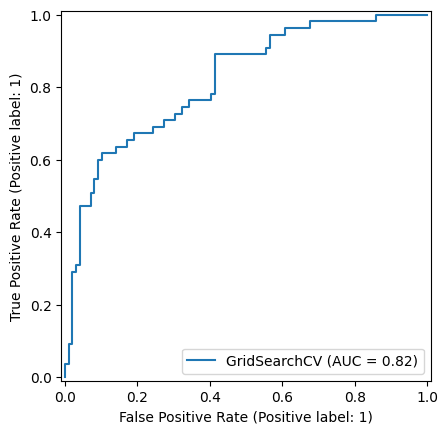

In [85]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test);

### 6.2 Creating a confusion matrix

In [86]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[80 19]
 [18 37]]


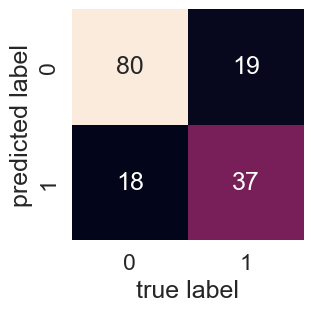

In [87]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### 6.3 Classification report

In [88]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [89]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [90]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [91]:
%%time

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

CPU times: total: 62.5 ms
Wall time: 51 ms


array([0.77272727, 0.73376623, 0.74025974, 0.79084967, 0.74509804])

In [92]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7565401918343094

In [93]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.7182633126552249

In [94]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.5000698812019566

In [95]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.5873212219562648

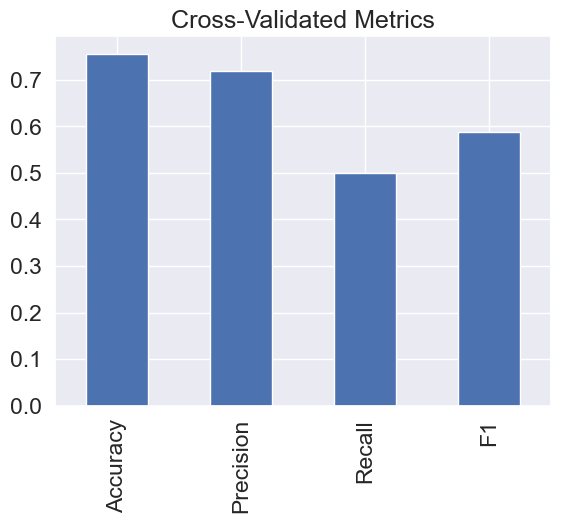

In [96]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# 7. Feature importance

In [97]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [98]:
# Check coef_
clf.coef_

array([[ 0.0756569 ,  0.01865054, -0.02339425,  0.00038146, -0.00026918,
         0.03267969,  0.25874776,  0.01212457]])

In [99]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'Pregnancies': 0.07565690080014387,
 'Glucose': 0.01865053875057026,
 'BloodPressure': -0.023394254729134395,
 'SkinThickness': 0.0003814648050793063,
 'Insulin': -0.0002691797774001484,
 'BMI': 0.032679691650735386,
 'DiabetesPedigreeFunction': 0.25874776168446445,
 'Age': 0.012124574817402858}

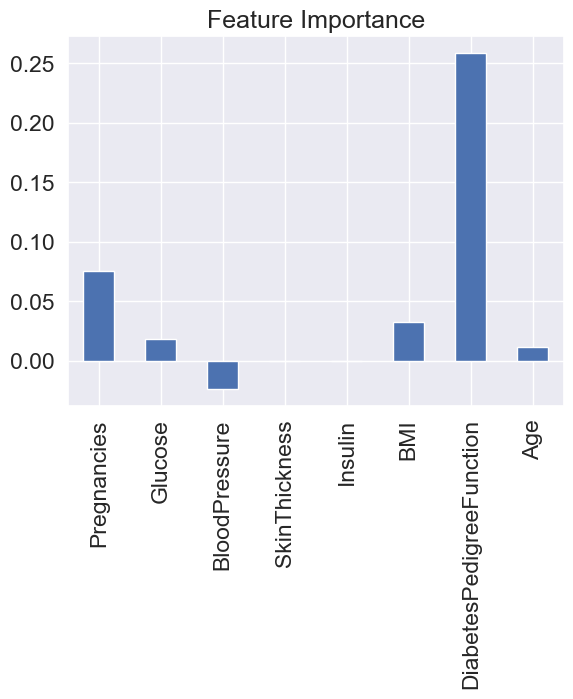

In [100]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [101]:
pd.crosstab(df["Age"], df["Outcome"])

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


In [102]:
# Contrast slope (positive coefficient) with Outcome
pd.crosstab(df["Age"], df["Outcome"])

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13
